In [1]:
%matplotlib inline

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

df = pd.read_csv('./Datasets/CDR.csv')

/home/faris/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
df['CallTime'] = pd.to_timedelta(df.CallTime)
df['CallDate'] = pd.to_datetime(df.CallDate)

In [2]:
df.columns

Index([u'In', u'Out', u'Direction', u'CallDate', u'CallTime', u'DOW',
       u'Duration', u'TowerID', u'TowerLat', u'TowerLon'],
      dtype='object')

In [12]:
weekend = df[(df.DOW == 'Sat') | (df.DOW == 'Sun')]
weekday = df[(df.DOW != 'Sat') & (df.DOW != 'Sun')]

In [11]:
unique_numbers = df.In.unique()

In [40]:
def clusterWithFewestSamples(model):
  # Ensure there's at least one cluster...
  minSamples = len(model.labels_)
  minCluster = 0
  for i in range(len(model.cluster_centers_)):
    if minSamples > (model.labels_==i).sum():
      minCluster = i
      minSamples = (model.labels_==i).sum()
  print "\n  Cluster With Fewest Samples: ", minCluster
  return (model.labels_==minCluster)

def show_user_locs(userq, cluster_num=2):
    latlon = userq[['TowerLon', 'TowerLat']]
    kmeans = KMeans(n_clusters=cluster_num)
    kmeans_model = kmeans.fit(latlon)
    centroids = kmeans_model.cluster_centers_
    print(userq.In.unique()[0])
    print("Call time {}".format(userq.CallTime.mean()))
    print(userq.CallTime)
    print(centroids)
    clusterWithFewestSamples(kmeans_model)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(userq.TowerLon, userq.TowerLat, c='blue', alpha=0.2, s=10, linewidths=1)
    ax2 = fig.add_subplot(111)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)

In [45]:
def get_home_df(userq):
    start = "06:00:00"
    end = "22:00:00"
    homedf = userq[(userq.CallTime < start) | (userq.CallTime > end)]
    return homedf

def get_work_df(userq):
    start = "09:30:00"
    end = "17:00:00"
    workdf = userq[(userq.CallTime < start) | (userq.CallTime > end)]
    return workdf

def get_commute_df(userq):
    start = "05:00:00"
    end = "11:00:00"
    commutedf = userq[(userq.CallTime > start) | (userq.CallTime < end)]
    return commutedf


## Show User Work Locations

4638472273
[[-96.71223398  32.73541259]
 [-96.90907597  32.90020313]
 [-96.83011526  32.84922987]]


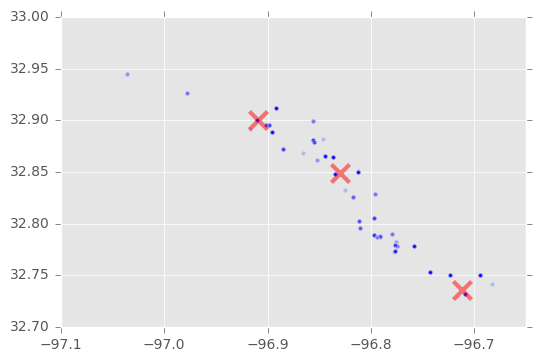

In [29]:
for inbound in unique_numbers[:1]:
    user = weekday[(weekday.In == inbound)]
    user = get_work_df(user)
    show_user_locs(user, cluster_num=3)

4638472273
[[-96.70944573  32.73164942]
 [-96.694722    32.750556  ]]


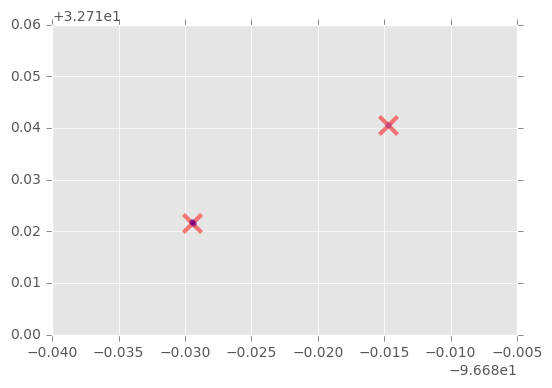

In [22]:
for inbound in unique_numbers[:1]:
    user = weekend[(weekend.In == inbound)]
    user = get_home_df(user)
    show_user_locs(user, cluster_num=2)

4638472273
[[-96.71223398  32.73541259]
 [-96.90907597  32.90020313]
 [-96.83011526  32.84922987]]
1559410755
[[-96.92352641  32.87104467]
 [-96.93334196  32.69781897]
 [-96.91288297  32.78318123]]
4931532174
[[-96.89340231  32.77974841]
 [-96.86620283  32.86431488]
 [-96.88461782  32.82135682]]
2419930464
[[-96.84740693  32.85417348]
 [-96.83517077  32.8470108 ]
 [-96.83606672  32.83638744]]
1884182865
[[-96.7577179   32.92188567]
 [-96.73036669  32.87499908]
 [-96.741944    32.909167  ]]
3688089071
[[-96.68846101  32.77147358]
 [-96.86720981  32.8117619 ]
 [-96.78483857  32.79115984]]
4555003213
[[-96.84023385  32.70497034]
 [-96.74484167  32.75170997]
 [-96.80130559  32.72598157]]
2068627935
[[-96.61112021  32.70293439]
 [-96.82987208  32.7210019 ]
 [-96.74193493  32.71923832]]
2894365987
[[-96.8908266   32.72121191]
 [-96.81367521  32.7737975 ]
 [-96.85118694  32.75239037]]
8549533077
[[-96.78093816  32.77686505]
 [-96.80260157  32.98308788]
 [-96.80428093  32.90889711]]


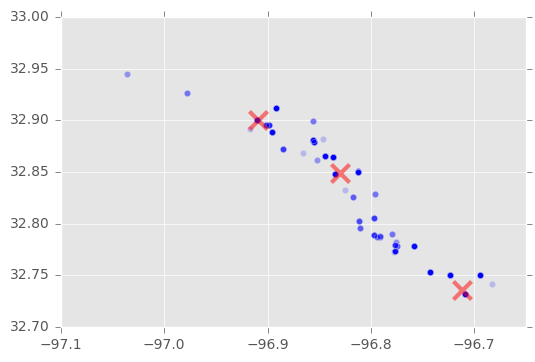

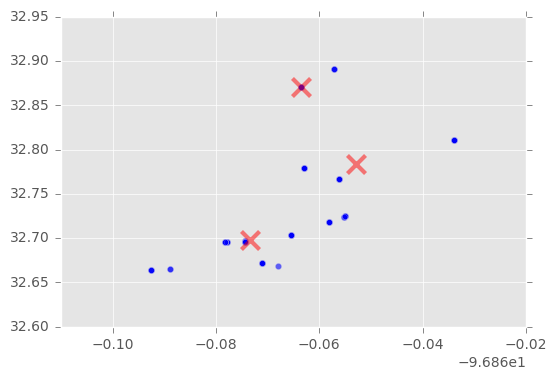

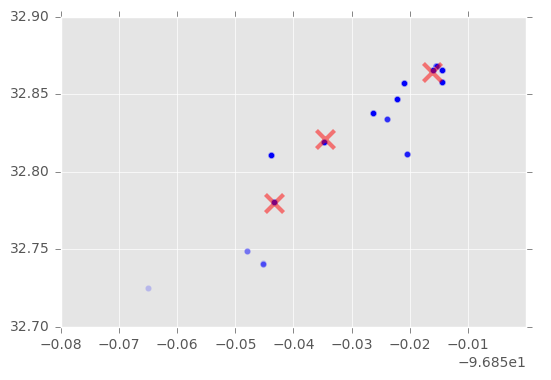

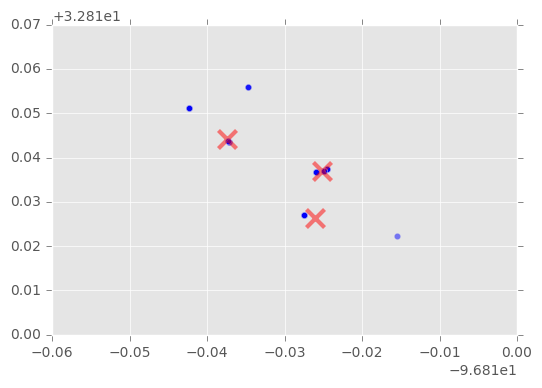

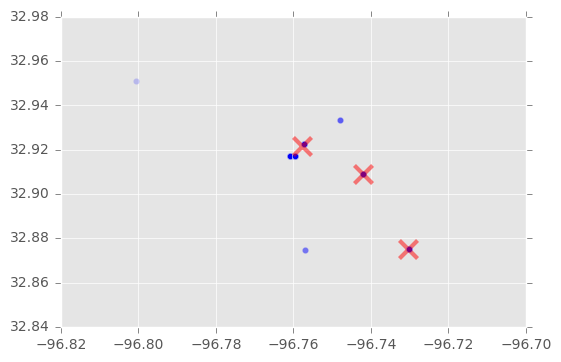

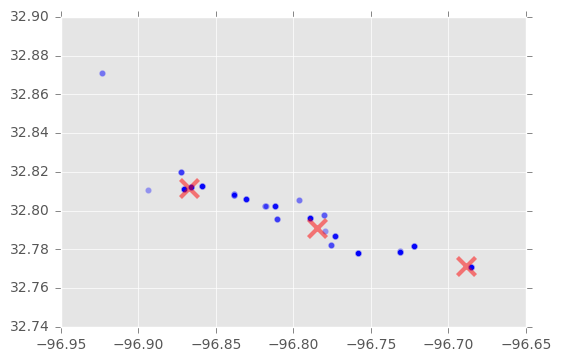

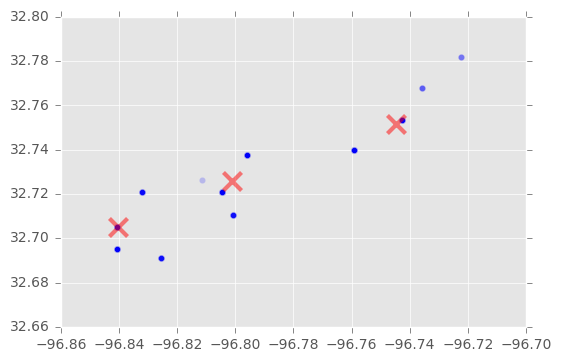

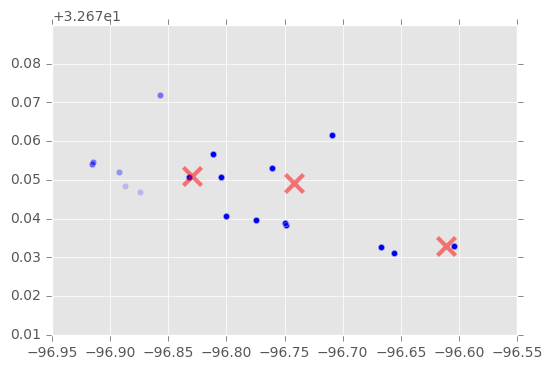

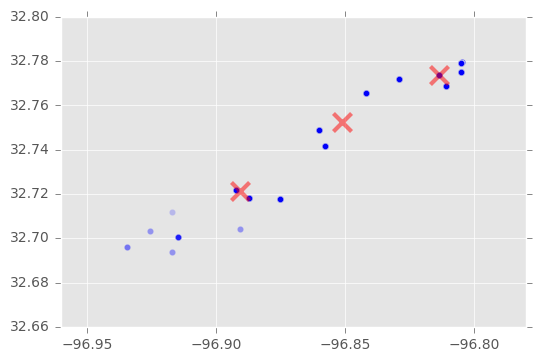

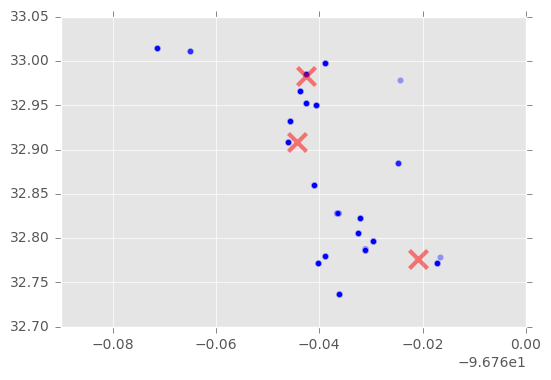

In [23]:
for inbound in unique_numbers:
    user = weekday[(weekday.In == inbound)]
    user = get_work_df(user)
    show_user_locs(user, cluster_num=3)

From Google we find that the long lat for the US Post Office is `-96.9652177`, `32.7357811`

```
1559410755
[[-96.92352641  32.87104467]
 [-96.93334196  32.69781897]
 [-96.91288297  32.78318123]]
```

Fits this pattern the closest with `-96.91288297  32.78318123`


## Commute Locations

4638472273
Call time 0 days 13:55:26.381777
161     18:41:14.639828
194     21:36:14.190286
195     19:57:19.501140
196     17:10:15.465881
197     16:20:11.532130
198     19:41:43.122708
199     18:05:51.247679
200     15:27:51.105337
201     20:43:50.766312
245     18:20:56.628554
246     17:59:50.895586
247     19:16:16.463142
248     09:13:35.198987
249     06:02:11.319738
250     13:54:14.724722
251     15:45:52.307534
252     19:29:54.814022
321     06:26:22.828987
322     18:54:53.880202
323     09:31:15.879551
324     18:50:06.183510
325     21:05:26.008063
403     08:29:48.427392
404     20:40:56.233240
405     18:58:54.751127
406     08:55:44.522912
613     19:06:05.434181
614     07:24:37.504329
615     07:16:56.658894
616     16:03:10.997508
              ...      
52660   07:46:58.730624
52735   12:26:27.514880
52736   20:09:59.664110
52737   11:33:21.023266
52738   12:52:46.457510
52739   08:05:38.239715
52740   19:00:38.736857
52842   08:53:20.110089
52843   08:15:05.429

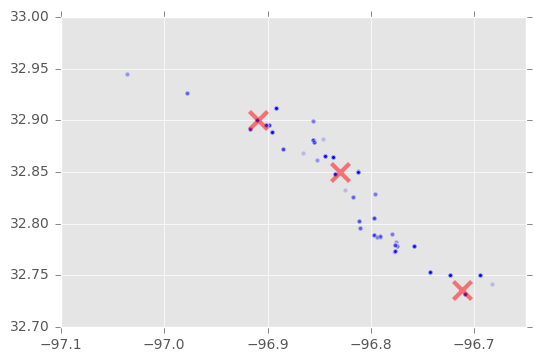

In [46]:
for inbound in unique_numbers[:1]:
    user = weekday[(weekday.In == inbound)]
    user = get_commute_df(user)
    show_user_locs(user, cluster_num=3)